In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pickle

from matplotlib import font_manager, rc

In [2]:
with open("figure2_heatmap.pkl", "rb") as f:
    mat = pickle.load(f)
data = pd.read_csv("sci_lex.csv")

In [3]:
platform = ['YouTube', 'Spotify', 'Netflix Film', 'Netflix TV'] # 'YouTube Music', 'Spotify Weekly'
country_code = ["US", "CA", "GB", "DE", "FR", "BR", "MX", "IN", "JP", "KR"]

In [4]:
y_ticks = [[500, 1000, 5000, 10000, 20000],
         [500, 1000, 2000, 3000],
         [100, 200, 300, 400],
         [50, 100, 200]]
xticks_sci = [100, 1000, 10000]
xticks_lan = [1, 10, 100]

In [5]:
from sklearn.linear_model import LinearRegression
from scipy import stats

def regression(x, y):
    x=np.array(x)
    y=np.array(y)

    result = stats.linregress(np.log10(x), np.log10(y))
    
    r_value = result.rvalue
    p_value = result.pvalue

    # Predicting y for the minimum and maximum x values
    x_minmax = np.array([min(x), max(x)])
    y_pred = result.slope * np.log10(x_minmax) + result.intercept


    return x_minmax, y_pred, r_value**2, p_value

In [6]:
# # Fig.3(a) Facebook Social Connectedness

# temp = data[data['user_loc'] != data['fr_loc']]

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 6.66))
# for i in range(2):
#     for j in range(2):
#         p = platform[i*2 + j]

#         x_minmax, y_pred, r2 = regression(temp['fb_sci'], temp[p])

#         sns.scatterplot(temp, x='fb_sci', y=p, s=40, alpha=0.6, ax=axes[i, j])
#         axes[i, j].plot(x_minmax, 10**y_pred, color = 'orange', linewidth=2)
#         axes[i, j].set_xscale("log")
#         axes[i, j].set_yscale("log")
#         axes[i, j].tick_params(axis='x', labelsize=10)
#         axes[i, j].tick_params(axis='y', labelsize=10)
#         legend = axes[i, j].legend([f'{p} ($R^2={r2:.3f}$)'], handlelength = 0, handletextpad = 0, loc='upper left', fontsize=12)
#         legend.legend_handles[0].set_visible(False)
#         axes[i, j].set_xlabel("Facebook Social Connectedness Index", fontsize=12)
#         axes[i, j].set_ylabel("Number of Sharing Contents", fontsize=12)
# plt.tight_layout()
# plt.savefig('./fig3a.png')
# plt.show()

In [7]:
# # Fig.3(b)

# temp = data[data['user_loc'] != data['fr_loc']]

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 6.66))
# for i in range(2):
#     for j in range(2):
#         p = platform[i*2 + j]

#         x_minmax, y_pred, r2 = regression(temp['NewSimilarity'], temp[p])

#         sns.scatterplot(temp, x='NewSimilarity', y=p, s=40, alpha=0.6, ax=axes[i, j])
#         axes[i, j].plot(x_minmax, 10**y_pred, color = 'orange', linewidth=2)
#         axes[i, j].set_xscale("log")
#         axes[i, j].set_yscale("log")
#         axes[i, j].tick_params(axis='x', labelsize=10)
#         axes[i, j].tick_params(axis='y', labelsize=10)
#         legend = axes[i, j].legend([f'{p} ($R^2={r2:.3f}$)'], handlelength = 0, handletextpad = 0, loc='upper left', fontsize=12)
#         legend.legend_handles[0].set_visible(False)
#         axes[i, j].set_xlabel("Language Lexicon Similarity", fontsize=12)
#         axes[i, j].set_ylabel("Number of Sharing Contents", fontsize=12)
# plt.tight_layout()
# plt.savefig('./fig3b.png')
# plt.show()

## SciFormat

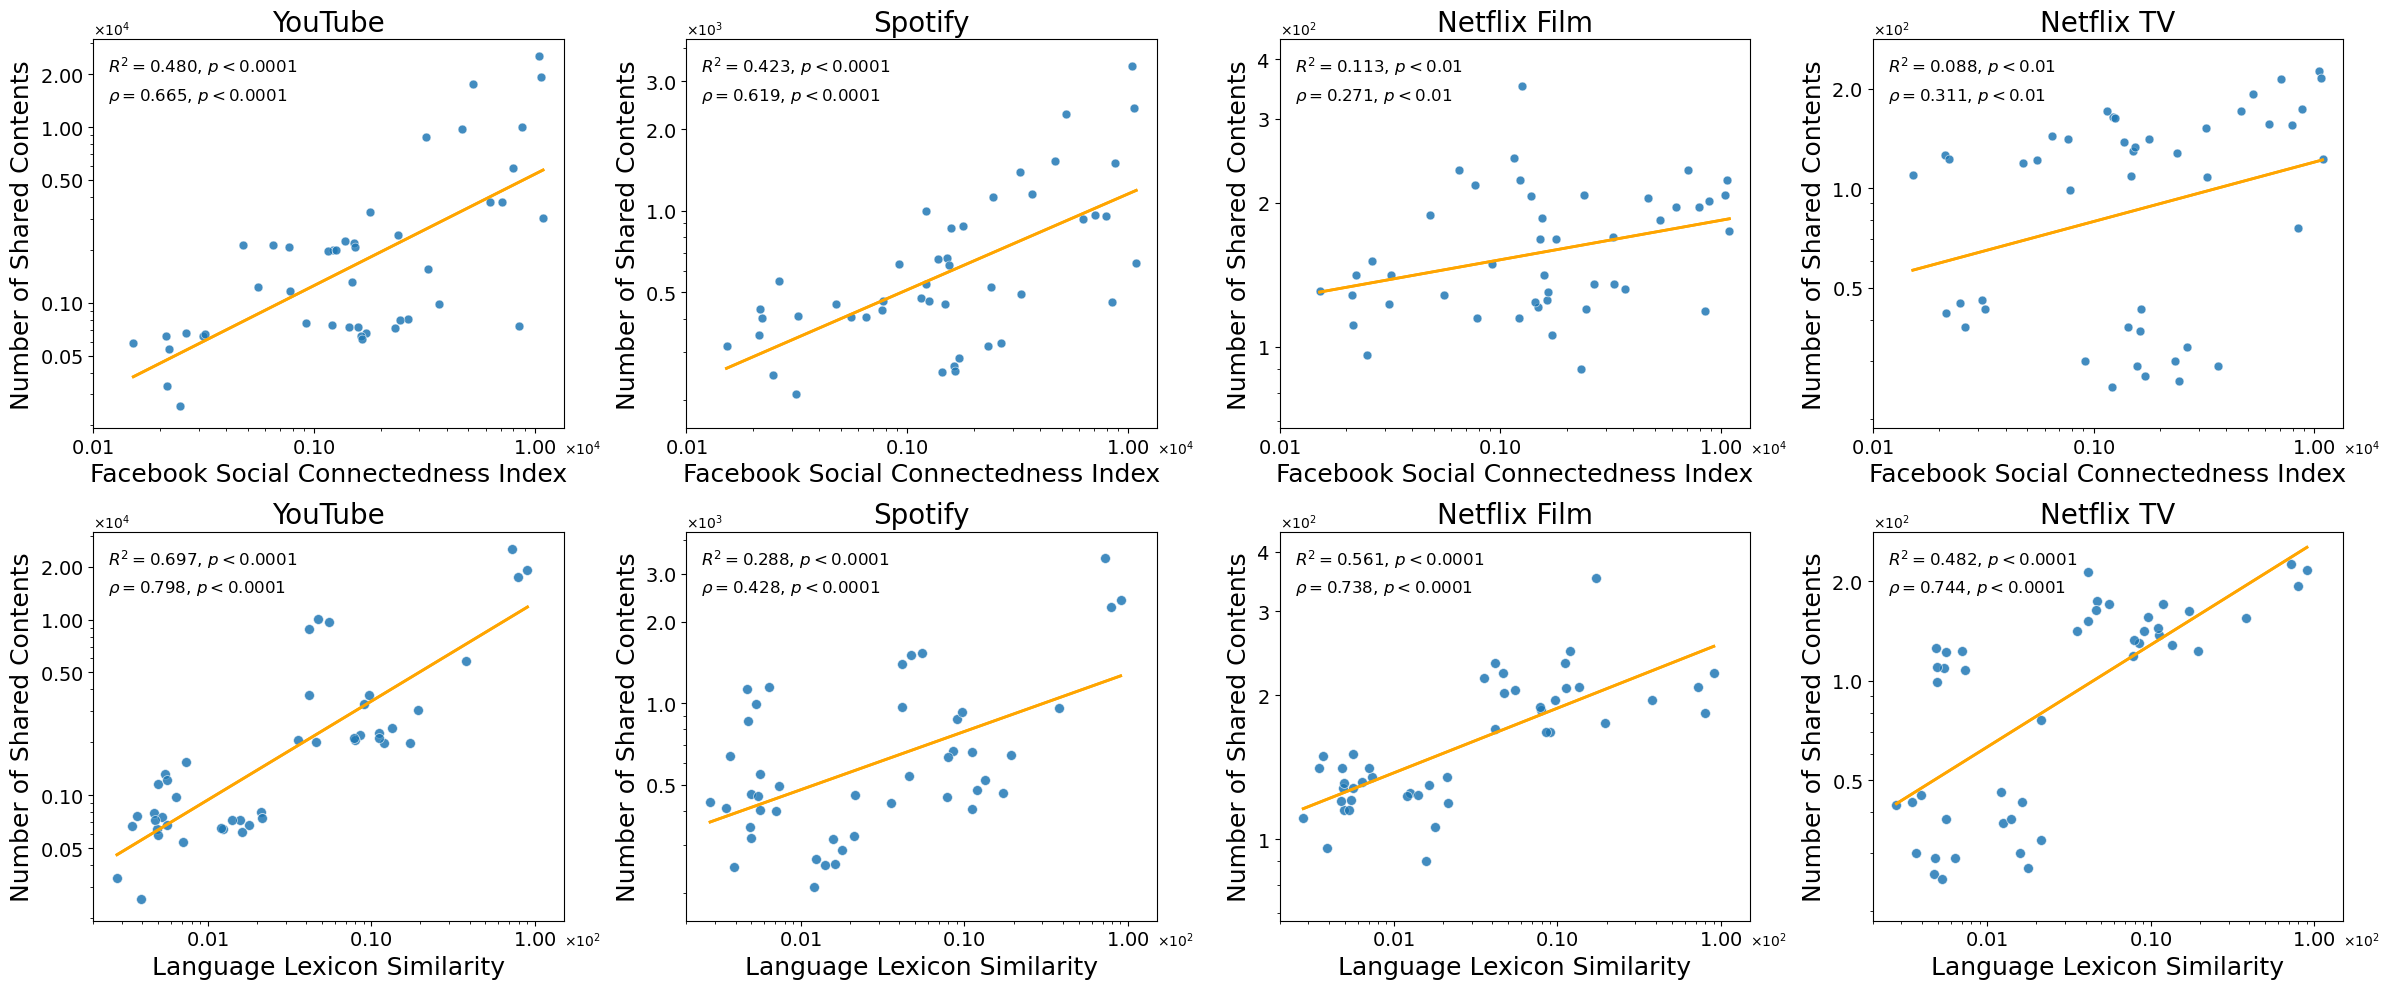

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogLocator, LogFormatterSciNotation, LogFormatterMathtext, LogFormatterExponent
import types
from scipy.stats import spearmanr
import statsmodels.api as sm

significance_levels = [0.10, 0.05, 0.01, 0.001, 0.0001]
significance_notation = ['*', '**', '***', '****']

# Fig.3(a) Facebook Social Connectedness
temp = data[data['user_loc'] != data['fr_loc']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))  # 2 rows, 4 columns

def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymin
    self.offsetText.set(va="top", ha="left") 
    oy = bottom - pad * self.figure.dpi / 72.0
    self.offsetText.set_position((1, oy))

# Plot for Fig.3(a)
i=0
for j in range(4):
    p = platform[j]

    x_minmax_a, y_pred_a, r2, _r = regression(temp['fb_sci'], temp[p])
    rho, _ = spearmanr(temp['fb_sci'], temp[p])
    
    for level in significance_levels:
        if _ < level:
            p_val = level
    for level in significance_levels:
        if _r < level:
            p_val_r = level
   
    sns.scatterplot(temp, x='fb_sci', y=p, s=40, alpha=0.6, ax=axes[i, j])
    axes[i, j].plot(x_minmax_a, 10**y_pred_a, color='orange', linewidth=2)
    axes[i, j].plot(x_minmax_a, 10**y_pred_a, color='orange', linewidth=2)
    axes[i, j].set_xscale("log")
    axes[i, j].set_yscale("log")

    axes[i, j].set_xticks(xticks_sci)
    axes[i, j].set_yticks(y_ticks[j])

    axes[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[i, j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
    axes[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[i, j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    axes[i, j].set_ylim(temp[p].min()*0.75, temp[p].max()*1.25)

    pad = plt.rcParams["xtick.major.size"] + plt.rcParams["xtick.major.pad"]
    axes[i, j].xaxis._update_offset_text_position = types.MethodType(bottom_offset, axes[i, j].xaxis)

    axes[i, j].set_title(p, fontsize=20)

    axes[i, j].tick_params(axis='x', labelsize=14)
    axes[i, j].tick_params(axis='y', labelsize=14)

    legend = axes[i, j].legend([rf'$R^2={r2:.3f}$'+', ' + rf'$p < {p_val_r}$',
                                rf'$\rho={rho:.3f}$'+', '+rf'$p < {p_val}$'], handlelength = 0, handletextpad = 0, loc='upper left', fontsize=12, frameon=False)
    legend.legend_handles[0].set_visible(False)
    legend.legend_handles[1].set_visible(False)
    
    axes[i, j].set_xlabel("Facebook Social Connectedness Index", fontsize=18)
    axes[i, j].set_ylabel("Number of Shared Contents", fontsize=18)

# Plot for Fig.3(b)
i=1
for j in range(4):
    p = platform[j]
    x_minmax_b, y_pred_b, r2, _r = regression(temp['NewSimilarity'], temp[p])
    rho, _ = spearmanr(np.log10(temp['NewSimilarity']), np.log10(temp[p]))
    
    for level in significance_levels:
        if _ < level:
            # p_val = significance_notation[significance_levels.index(level)]
            p_val = level
            
    for level in significance_levels:
        if _r < level:
            # p_val = significance_notation[significance_levels.index(level)]
            p_val_r = level

    sns.scatterplot(temp, x='NewSimilarity', y=p, s=50, alpha=0.6, ax=axes[i, j])
    axes[i, j].plot(x_minmax_b, 10**y_pred_b, color='orange', linewidth=2)
    axes[i, j].plot(x_minmax_b, 10**y_pred_b, color='orange', linewidth=2)


    axes[i, j].set_xscale("log")
    axes[i, j].set_yscale("log")

    axes[i, j].set_xticks(xticks_lan)
    axes[i, j].set_yticks(y_ticks[j])

    axes[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[i, j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
    axes[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[i, j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    pad = plt.rcParams["xtick.major.size"] + plt.rcParams["xtick.major.pad"]
    axes[i, j].xaxis._update_offset_text_position = types.MethodType(bottom_offset, axes[i, j].xaxis)


    axes[i, j].set_xlim(0.2, 150)
    axes[i, j].set_ylim(temp[p].min()*0.75, temp[p].max()*1.25)

    axes[i, j].set_title(p, fontsize=20)
    axes[i, j].tick_params(axis='x', labelsize=14)
    axes[i, j].tick_params(axis='y', labelsize=14)

    legend = axes[i, j].legend([rf'$R^2={r2:.3f}$'+', ' + rf'$p < {p_val_r}$',
                                rf'$\rho={rho:.3f}$'+', '+rf'$p < {p_val}$'], handlelength = 0, handletextpad = 0, loc='upper left', fontsize=12, frameon=False)
    legend.legend_handles[0].set_visible(False)
    legend.legend_handles[1].set_visible(False)

    axes[i, j].set_xlabel("Language Lexicon Similarity", fontsize=18)
    axes[i, j].set_ylabel("Number of Shared Contents", fontsize=18)
        
plt.tight_layout()
plt.savefig('./results/figure3_p_val.pdf')
plt.show()


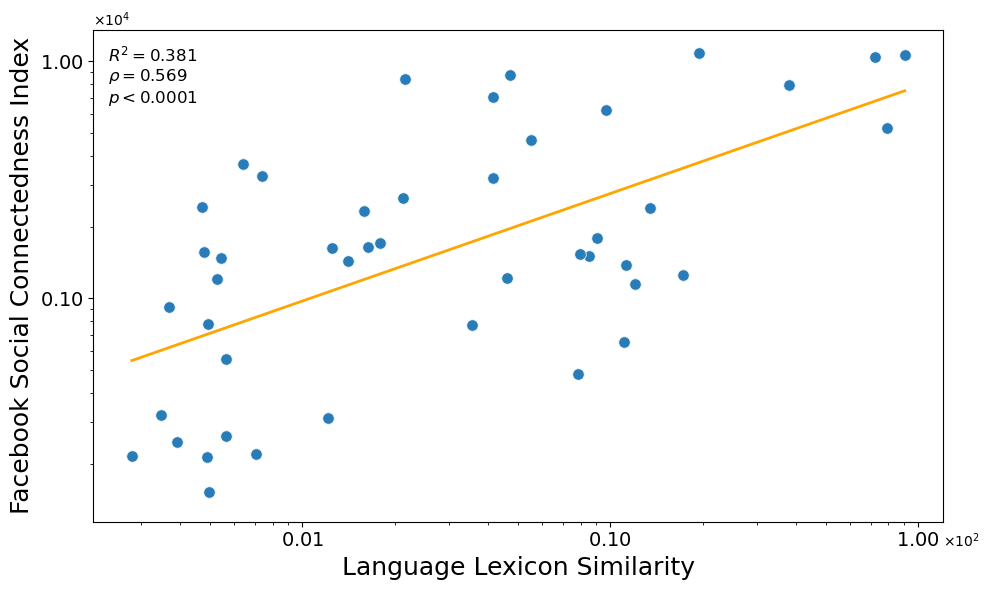

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
x_minmax_b, y_pred_b, r2, _r = regression(temp['NewSimilarity'], temp['fb_sci'])
rho, _ = spearmanr(np.log10(temp['NewSimilarity']), np.log10(temp['fb_sci']))
    
for level in significance_levels:
    if _ < level:
        p_val = level
                   
rho, _ = spearmanr(temp['NewSimilarity'], temp['fb_sci'])

sns.scatterplot(temp, x='NewSimilarity', y='fb_sci', s=70, alpha=0.8, ax=ax)
ax.plot(x_minmax_b, 10**y_pred_b, color='orange', linewidth=2)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xticks(xticks_lan)
ax.set_yticks(xticks_sci)

ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

pad = plt.rcParams["xtick.major.size"] + plt.rcParams["xtick.major.pad"]
ax.xaxis._update_offset_text_position = types.MethodType(bottom_offset, ax.xaxis)

ax.set_ylim(temp['fb_sci'].min()*0.75, temp['fb_sci'].max()*1.25)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

legend = ax.legend([rf'$R^2={r2:.3f}$'+'\n'+rf'$\rho={rho:.3f}$'+'\n'+rf'$p < {p_val}$'], handlelength = 0, handletextpad = 0, loc='upper left', fontsize=12, frameon=False)
legend.legend_handles[0].set_visible(False)
#legend.legend_handles[1].set_visible(False)

ax.set_xlabel("Language Lexicon Similarity", fontsize=18)
ax.set_ylabel("Facebook Social Connectedness Index", fontsize=18)

plt.tight_layout()
plt.savefig('fig_s10_lexicon_fbsocial.pdf')
plt.show()